In [ ]:
# ==============================================================================
# DATA EXPLORATION AND PREPROCESSING NOTEBOOK
# Đồ án phân tích dữ liệu thị trường crypto - Phần 2.2
# Sử dụng CryptoDataProcessor từ data_processor.py
# Sử dụng CryptoVisualizer từ visualizer.py
# ==============================================================================

# 1. IMPORT THƯ VIỆN VÀ MODULES
# ==============================================================================
import sys
import os
sys.path.append('../src')



# Import custom modules
from data_processor import CryptoDataProcessor
from visualizer import CryptoVisualizer

# Import các thư viện khác
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Thiết lập hiển thị
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.6f}'.format)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

# Tạo thư mục cho hình ảnh
os.makedirs('exploration_visualizations', exist_ok=True)

print("="*80)
print("PHÂN TÍCH DỮ LIỆU VÀ TIỀN XỬ LÝ - CRYPTO HOURLY DATA")
print("Phần 2.2: Data Exploration and Preprocessing")
print("="*80)

PHÂN TÍCH DỮ LIỆU VÀ TIỀN XỬ LÝ - CRYPTO HOURLY DATA
Phần 2.2: Data Exploration and Preprocessing


In [2]:
# 2. ĐỌC VÀ TẢI DỮ LIỆU
# ==============================================================================
print("\n" + "="*80)
print("BƯỚC 1: ĐỌC VÀ TẢI DỮ LIỆU")
print("="*80)

# Khởi tạo processor
processor = CryptoDataProcessor(file_path='data/raw/crypto_hourly_data.csv')

# Tải dữ liệu
df = processor.load_data()

print(f"\nĐã tải dữ liệu thành công")
print(f"• Số bản ghi: {len(df):,}")
print(f"• Số cột: {len(df.columns)}")
print(f"• Phạm vi thời gian: {df['timestamp'].min()} đến {df['timestamp'].max()}")
print(f"• Trading pair: {df['symbol'].unique()[0] if 'symbol' in df.columns else 'N/A'}")
print(f"• Timeframe: {df['interval'].unique()[0] if 'interval' in df.columns else 'N/A'}")

# Hiển thị 5 dòng đầu
print("\n5 dòng đầu của dữ liệu gốc:")
display(df.head())


BƯỚC 1: ĐỌC VÀ TẢI DỮ LIỆU
Lỗi khi tải dữ liệu: [Errno 2] No such file or directory: 'data/raw/crypto_hourly_data.csv'

Đã tải dữ liệu thành công


TypeError: object of type 'NoneType' has no len()

In [12]:
# 3. KHÁM PHÁ DỮ LIỆU CHI TIẾT (DATA EXPLORATION)
# ==============================================================================
print("\n" + "="*80)
print("BƯỚC 2: KHÁM PHÁ DỮ LIỆU CHI TIẾT")
print("="*80)

print("\nA. Ý NGHĨA CỦA TỪNG CỘT:")
print("-" * 50)

column_descriptions = {
    'open': 'Giá mở cửa tại đầu mỗi giờ',
    'high': 'Giá cao nhất trong giờ',
    'low': 'Giá thấp nhất trong giờ',
    'close': 'Giá đóng cửa cuối giờ',
    'volume': 'Khối lượng giao dịch (base currency)',
    'quote_volume': 'Khối lượng giao dịch (quote currency)',
    'trades_count': 'Số lượng giao dịch trong giờ',
    'taker_buy_base_volume': 'Khối lượng mua từ taker (base)',
    'taker_buy_quote_volume': 'Khối lượng mua từ taker (quote)',
    'timestamp': 'Thời điểm bắt đầu của khoảng thời gian',
    'date': 'Ngày',
    'time': 'Giờ',
    'symbol': 'Cặp giao dịch',
    'interval': 'Khoảng thời gian (1h)'
}

for col in df.columns:
    desc = column_descriptions.get(col, 'Không có mô tả')
    print(f"• {col}: {desc}")

# Sử dụng hàm explore_data từ processor
print("\nB. THÔNG TIN TỔNG QUAN VỀ DỮ LIỆU:")
print("-" * 50)




BƯỚC 2: KHÁM PHÁ DỮ LIỆU CHI TIẾT

A. Ý NGHĨA CỦA TỪNG CỘT:
--------------------------------------------------
• open: Giá mở cửa tại đầu mỗi giờ
• high: Giá cao nhất trong giờ
• low: Giá thấp nhất trong giờ
• close: Giá đóng cửa cuối giờ
• volume: Khối lượng giao dịch (base currency)
• quote_volume: Khối lượng giao dịch (quote currency)
• trades_count: Số lượng giao dịch trong giờ
• taker_buy_base_volume: Khối lượng mua từ taker (base)
• taker_buy_quote_volume: Khối lượng mua từ taker (quote)
• timestamp: Thời điểm bắt đầu của khoảng thời gian
• date: Ngày
• time: Giờ
• symbol: Cặp giao dịch
• interval: Khoảng thời gian (1h)

B. THÔNG TIN TỔNG QUAN VỀ DỮ LIỆU:
--------------------------------------------------


In [13]:
df_explored = processor.explore_data()  

PHÂN TÍCH DỮ LIỆU CHI TIẾT

1. KÍCH THƯỚC DỮ LIỆU:
   • Số hàng: 29,042
   • Số cột: 14
   • Kích thước bộ nhớ: 11.18 MB

2. THÔNG TIN CÁC CỘT:
                   Cột    Kiểu   Missing                              Thống kê
                  open float64 0 (0.00%)         Min: 0.0000, Max: 116053.5000
                  high float64 0 (0.00%)         Min: 0.0000, Max: 116400.0000
                   low float64 0 (0.00%)         Min: 0.0000, Max: 115489.5300
                 close float64 0 (0.00%)         Min: 0.0000, Max: 116053.4900
                volume float64 0 (0.00%) Min: 22.7809, Max: 6309178016792.0000
          quote_volume float64 0 (0.00%)   Min: 1142.9789, Max: 889080852.8496
          trades_count   int64 0 (0.00%)         Min: 6.0000, Max: 984003.0000
 taker_buy_base_volume float64 0 (0.00%)  Min: 9.3940, Max: 2974350423597.0000
taker_buy_quote_volume float64 0 (0.00%)     Min: 16.9898, Max: 368743152.3210
             timestamp  object 0 (0.00%)                          


BƯỚC 3: PHÂN TÍCH KIỂU DỮ LIỆU VÀ PHÂN PHỐI

A. KIỂU DỮ LIỆU CỦA TỪNG CỘT:
--------------------------------------------------
Kiểu dữ liệu của từng cột:
• open: float64
• high: float64
• low: float64
• close: float64
• volume: float64
• quote_volume: float64
• trades_count: int64
• taker_buy_base_volume: float64
• taker_buy_quote_volume: float64
• timestamp: object
• date: object
• time: object
• symbol: object
• interval: object

B. KIỂM TRA KIỂU DỮ LIỆU KHÔNG PHÙ HỢP:
--------------------------------------------------
⚠ Cột 'timestamp' chứa thời gian nhưng không phải datetime
⚠ Cột 'time' chứa thời gian nhưng không phải datetime

C. PHÂN TÍCH PHÂN PHỐI CỦA CÁC CỘT SỐ:
--------------------------------------------------
Đang tạo biểu đồ phân phối cho các cột số...


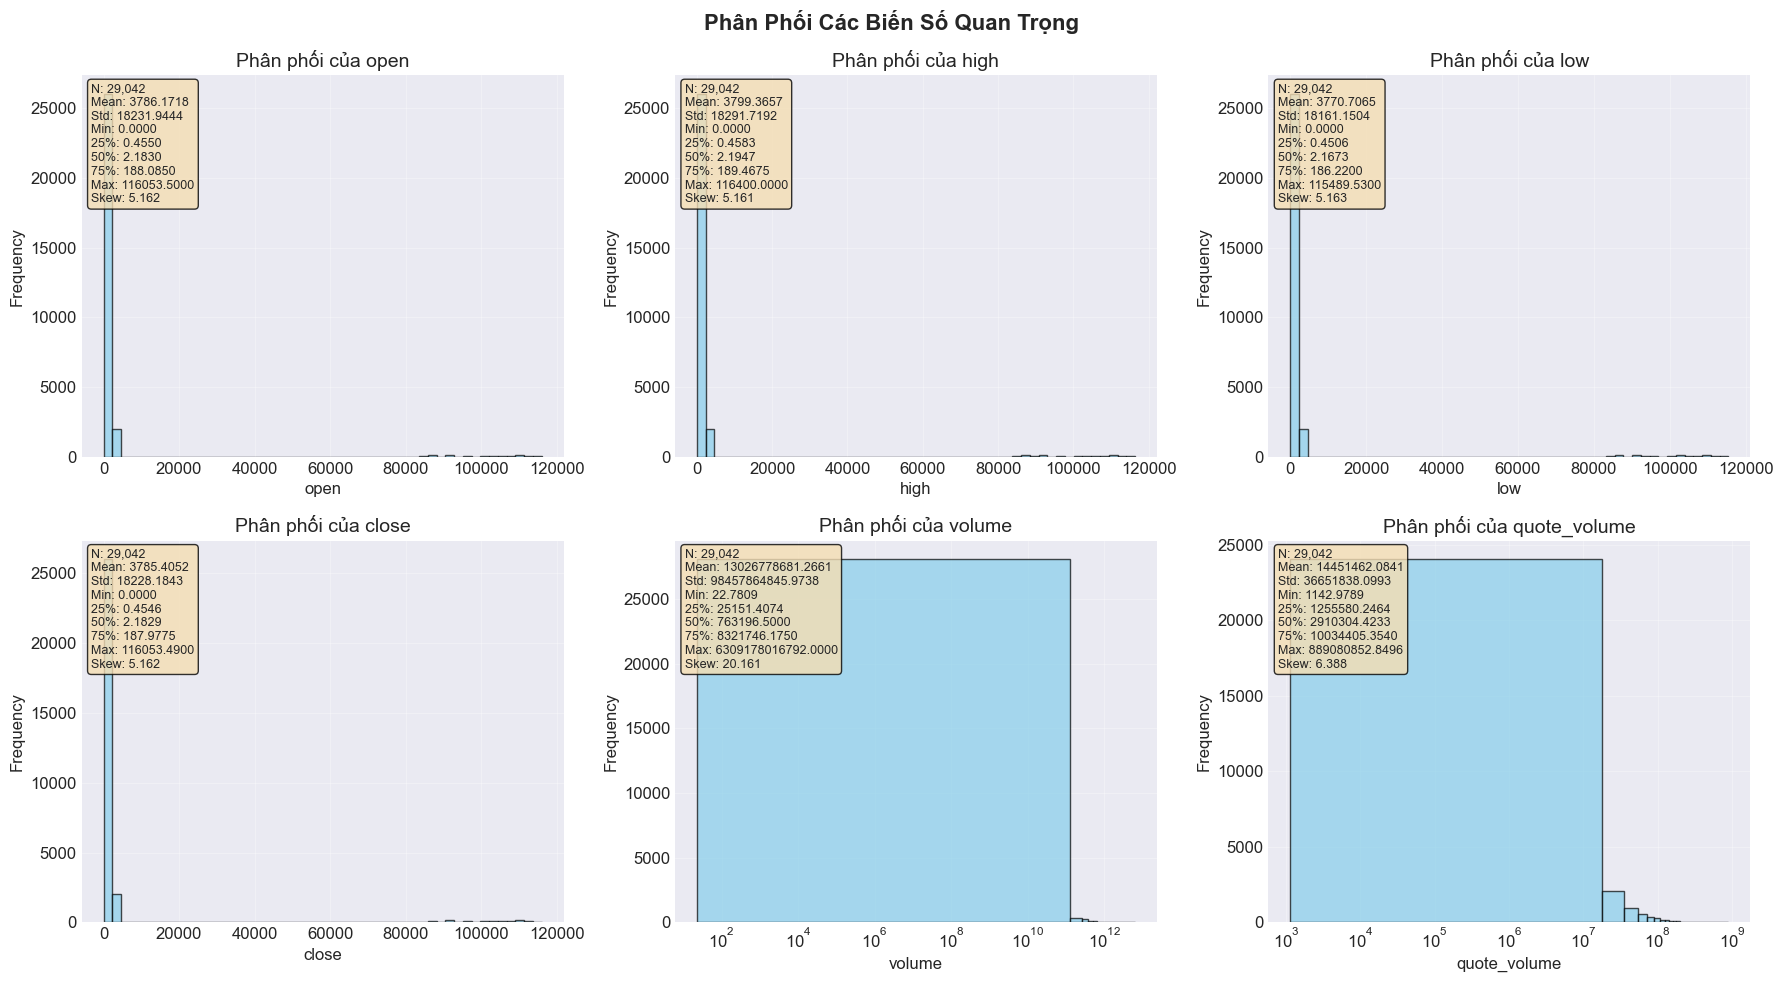

✓ Đã lưu biểu đồ phân phối vào 'exploration_visualizations/numeric_distributions.png'


In [14]:
# 4. PHÂN TÍCH KIỂU DỮ LIỆU VÀ PHÂN PHỐI VỚI VISUALIZER
# ==============================================================================
print("\n" + "="*80)
print("BƯỚC 3: PHÂN TÍCH KIỂU DỮ LIỆU VÀ PHÂN PHỐI")
print("="*80)

print("\nA. KIỂU DỮ LIỆU CỦA TỪNG CỘT:")
print("-" * 50)

# Phân tích kiểu dữ liệu
data_types = df.dtypes
print("Kiểu dữ liệu của từng cột:")
for col, dtype in data_types.items():
    print(f"• {col}: {dtype}")

print("\nB. KIỂM TRA KIỂU DỮ LIỆU KHÔNG PHÙ HỢP:")
print("-" * 50)

# Kiểm tra cột nào cần chuyển đổi kiểu dữ liệu
issues_found = False

for col in df.columns:
    if df[col].dtype == 'object':
        # Kiểm tra nếu có thể chuyển thành số
        try:
            pd.to_numeric(df[col])
            print(f"⚠ Cột '{col}' có kiểu object nhưng chứa giá trị số")
            issues_found = True
        except:
            pass
    
    # Kiểm tra timestamp
    if 'time' in col.lower() and df[col].dtype != 'datetime64[ns]':
        print(f"⚠ Cột '{col}' chứa thời gian nhưng không phải datetime")
        issues_found = True

if not issues_found:
    print("✓ Tất cả các cột đã có kiểu dữ liệu phù hợp")

print("\nC. PHÂN TÍCH PHÂN PHỐI CỦA CÁC CỘT SỐ:")
print("-" * 50)

# Khởi tạo visualizer với dữ liệu gốc
visualizer_raw = CryptoVisualizer(df)

# Tạo biểu đồ phân phối cho các cột số quan trọng
important_numeric_cols = ['open', 'high', 'low', 'close', 'volume', 'quote_volume']
available_cols = [col for col in important_numeric_cols if col in df.columns]

if len(available_cols) > 0:
    print("Đang tạo biểu đồ phân phối cho các cột số...")
    
    # Tạo figure lớn
    n_cols = min(3, len(available_cols))
    n_rows = (len(available_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
    fig.suptitle('Phân Phối Các Biến Số Quan Trọng', fontsize=16, fontweight='bold')
    
    # Flatten axes nếu cần
    if n_rows == 1 and n_cols == 1:
        axes = [axes]
    elif n_rows > 1 and n_cols > 1:
        axes = axes.flatten()
    
    # Vẽ từng biểu đồ phân phối
    for idx, col in enumerate(available_cols):
        if idx < len(axes):
            visualizer_raw.plot_distribution(
                axes[idx], 
                df[col], 
                f'Phân phối của {col}', 
                col, 
                color='skyblue', 
                show_stats=True, 
                bins=50
            )
            
            # Thêm log scale cho volume
            if col == 'volume' or col == 'quote_volume':
                axes[idx].set_xscale('log')
    
    # Ẩn các axes không sử dụng
    for idx in range(len(available_cols), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.savefig('exploration_visualizations/numeric_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✓ Đã lưu biểu đồ phân phối vào 'exploration_visualizations/numeric_distributions.png'")

In [15]:
# 5. PHÂN TÍCH MISSING VALUES
# ==============================================================================
print("\n" + "="*80)
print("BƯỚC 4: PHÂN TÍCH MISSING VALUES")
print("="*80)

# Tính toán missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Tạo DataFrame để hiển thị
missing_df = pd.DataFrame({
    'Cột': missing_values.index,
    'Missing Values': missing_values.values,
    'Percentage (%)': missing_percentage.values
})

# Sắp xếp theo số lượng missing giảm dần
missing_df = missing_df.sort_values('Missing Values', ascending=False)

print("\nA. TỔNG QUAN MISSING VALUES:")
print("-" * 50)
print(f"• Tổng số missing values: {missing_values.sum():,}")
print(f"• Tỷ lệ missing values: {missing_values.sum() / (len(df) * len(df.columns)) * 100:.2f}%")
print(f"• Số cột có missing values: {(missing_values > 0).sum()}")

# Hiển thị các cột có missing values
print("\nB. CÁC CỘT CÓ MISSING VALUES:")
print("-" * 50)
if missing_values.sum() > 0:
    # Chỉ hiển thị các cột có missing values
    missing_cols = missing_df[missing_df['Missing Values'] > 0]
    print(missing_cols.to_string(index=False))
    
    # Tạo biểu đồ cho missing values
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Lấy top 10 cột có nhiều missing nhất
    top_missing = missing_cols.head(10)
    
    visualizer_raw.plot_bar_chart(
        ax,
        top_missing['Cột'],
        top_missing['Percentage (%)'],
        'Top 10 Cột có Missing Values Cao Nhất',
        'Cột',
        'Missing (%)',
        colors='orange',
        horizontal=False,
        add_values=True
    )
    
    plt.tight_layout()
    plt.savefig('exploration_visualizations/missing_values_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("\n✓ Đã lưu biểu đồ missing values vào 'exploration_visualizations/missing_values_analysis.png'")
else:
    print("✓ Không có missing values trong dữ liệu")


BƯỚC 4: PHÂN TÍCH MISSING VALUES

A. TỔNG QUAN MISSING VALUES:
--------------------------------------------------
• Tổng số missing values: 0
• Tỷ lệ missing values: 0.00%
• Số cột có missing values: 0

B. CÁC CỘT CÓ MISSING VALUES:
--------------------------------------------------
✓ Không có missing values trong dữ liệu



BƯỚC 5: PHÂN TÍCH OUTLIERS

A. PHÂN TÍCH OUTLIERS BẰNG PHƯƠNG PHÁP IQR:
--------------------------------------------------
                   Cột  Outliers  Tỷ lệ (%)         Min             Q1         Median              Q3                  Max
                  open      5603  19.292748    0.000004       0.454975       2.183000      188.085000        116053.500000
                  high      5619  19.347841    0.000004       0.458325       2.194650      189.467500        116400.000000
                   low      5590  19.247986    0.000004       0.450575       2.167300      186.220000        115489.530000
                 close      5606  19.303078    0.000004       0.454550       2.182900      187.977500        116053.490000
                volume      4427  15.243441   22.780900   25151.407450  763196.500000  8321746.175000 6309178016792.000000
          quote_volume      4052  13.952207 1142.978900 1255580.246420 2910304.423290 10034405.354035     889080852.849642
          trade

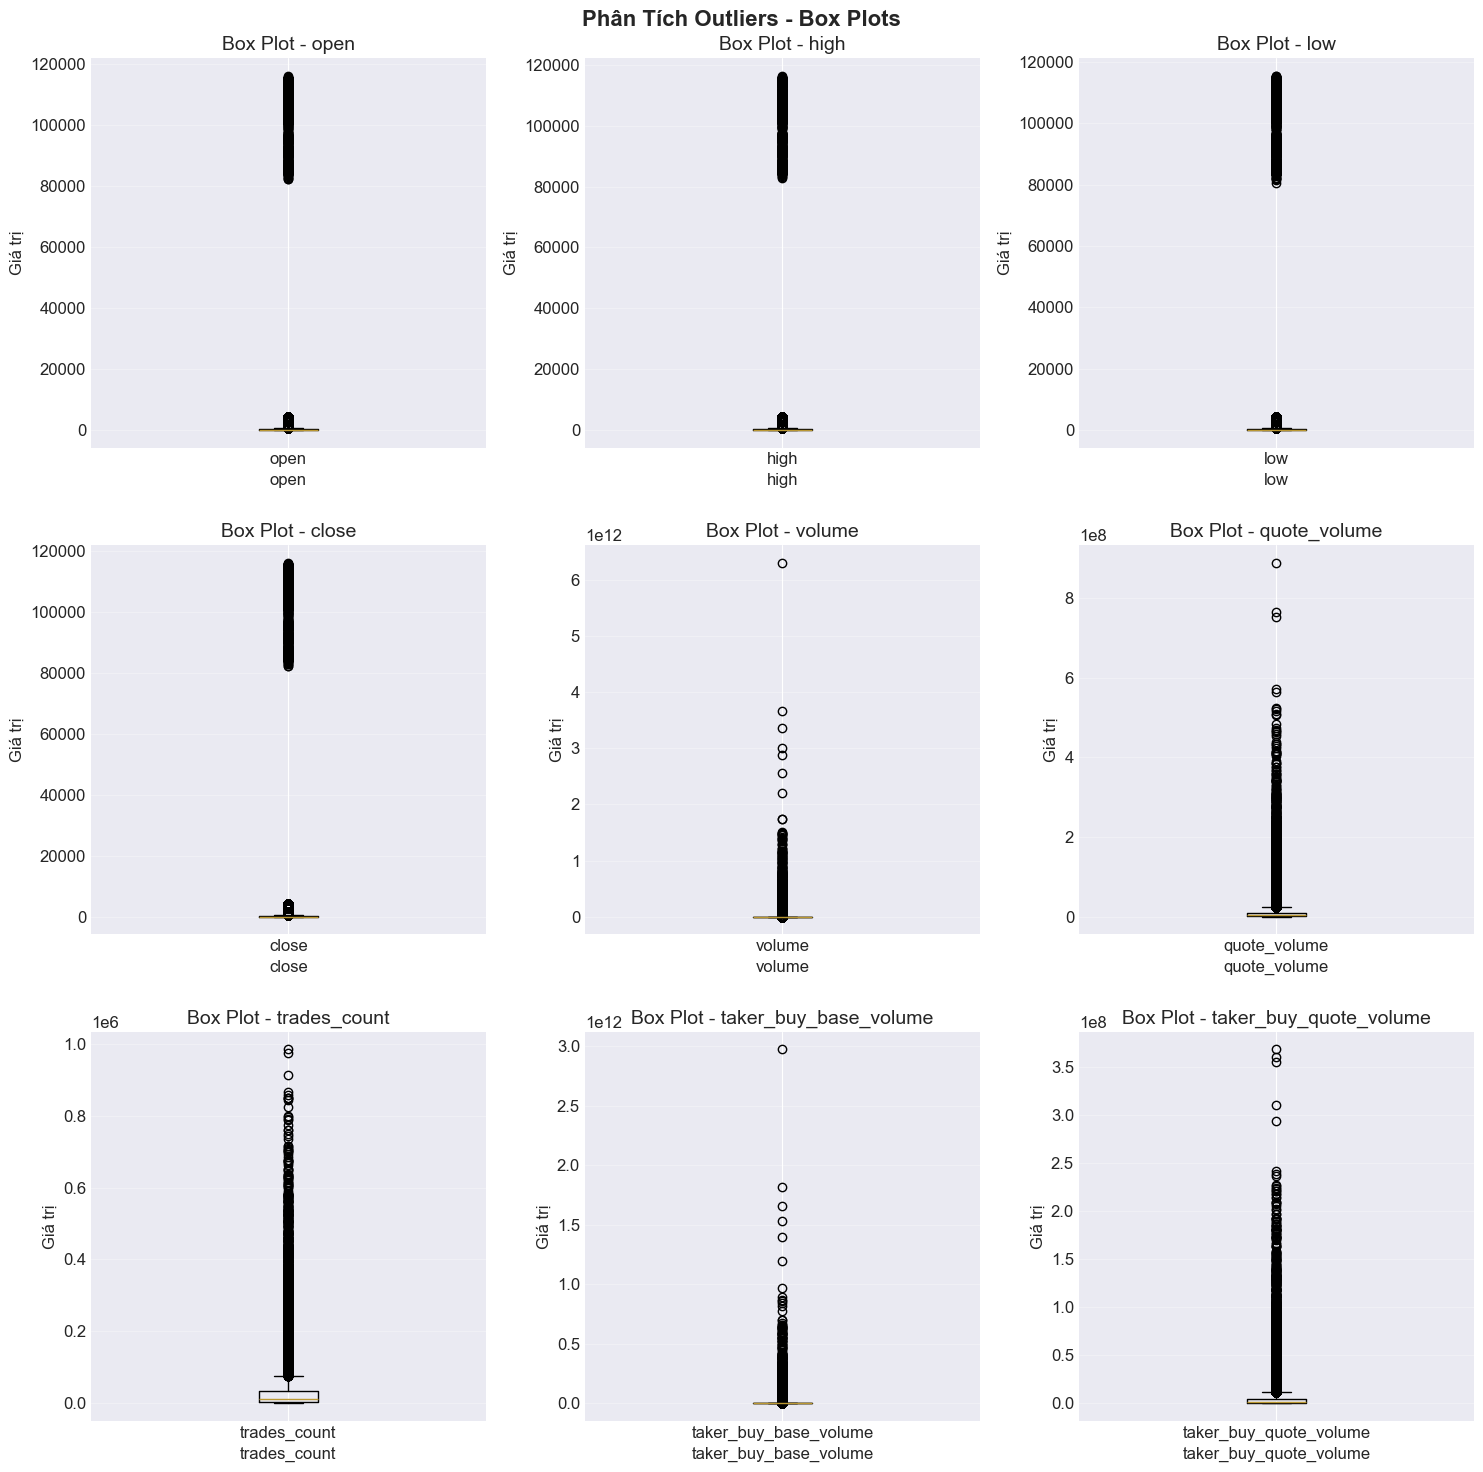


✓ Đã lưu biểu đồ outliers vào 'exploration_visualizations/outliers_box_plots.png'


In [16]:
# 6. PHÂN TÍCH OUTLIERS
# ==============================================================================
print("\n" + "="*80)
print("BƯỚC 5: PHÂN TÍCH OUTLIERS")
print("="*80)

print("\nA. PHÂN TÍCH OUTLIERS BẰNG PHƯƠNG PHÁP IQR:")
print("-" * 50)

# Chọn các cột số để phân tích outliers
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if len(numeric_cols) > 0:
    outliers_summary = []
    
    for col in numeric_cols[:10]:  # Chỉ phân tích 10 cột đầu
        # Tính IQR
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Xác định outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / len(df)) * 100
        
        outliers_summary.append({
            'Cột': col,
            'Outliers': outlier_count,
            'Tỷ lệ (%)': outlier_percentage,
            'Min': df[col].min(),
            'Q1': Q1,
            'Median': df[col].median(),
            'Q3': Q3,
            'Max': df[col].max()
        })
    
    # Tạo DataFrame và hiển thị
    outliers_df = pd.DataFrame(outliers_summary)
    print(outliers_df.to_string(index=False))
    
    # Tạo biểu đồ box plot cho outliers
    print("\nB. BIỂU ĐỒ BOX PLOT CHO CÁC CỘT CÓ OUTLIERS:")
    print("-" * 50)
    
    # Chọn các cột có outliers
    cols_with_outliers = outliers_df[outliers_df['Outliers'] > 0]['Cột'].tolist()
    
    if len(cols_with_outliers) > 0:
        n_cols = min(3, len(cols_with_outliers))
        n_rows = (len(cols_with_outliers) + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
        fig.suptitle('Phân Tích Outliers - Box Plots', fontsize=16, fontweight='bold')
        
        # Flatten axes
        if n_rows == 1 and n_cols == 1:
            axes = [axes]
        elif n_rows > 1 and n_cols > 1:
            axes = axes.flatten()
        
        for idx, col in enumerate(cols_with_outliers[:len(axes)]):
            data = [df[col].dropna()]
            labels = [col]
            
            visualizer_raw.plot_box_plot(
                axes[idx],
                data,
                labels,
                f'Box Plot - {col}',
                col,
                'Giá trị'
            )
        
        # Ẩn các axes không sử dụng
        for idx in range(len(cols_with_outliers), len(axes)):
            axes[idx].set_visible(False)
        
        plt.tight_layout()
        plt.savefig('exploration_visualizations/outliers_box_plots.png', dpi=300, bbox_inches='tight')
        plt.show()
        print("\n✓ Đã lưu biểu đồ outliers vào 'exploration_visualizations/outliers_box_plots.png'")
    else:
        print("✓ Không tìm thấy outliers đáng kể trong các cột được phân tích")
else:
    print("✗ Không có cột số để phân tích outliers")


BƯỚC 6: PHÂN TÍCH TƯƠNG QUAN

A. MA TRẬN TƯƠNG QUAN GIỮA CÁC BIẾN SỐ:
--------------------------------------------------
Ma trận tương quan:
                            open      high       low     close    volume  \
open                    1.000000  1.000000  1.000000  1.000000 -0.027000   
high                    1.000000  1.000000  1.000000  1.000000 -0.027000   
low                     1.000000  1.000000  1.000000  1.000000 -0.027000   
close                   1.000000  1.000000  1.000000  1.000000 -0.027000   
volume                 -0.027000 -0.027000 -0.027000 -0.027000  1.000000   
quote_volume            0.443000  0.444000  0.442000  0.443000 -0.037000   
trades_count            0.466000  0.466000  0.465000  0.465000 -0.048000   
taker_buy_base_volume  -0.027000 -0.027000 -0.027000 -0.027000  0.993000   
taker_buy_quote_volume  0.431000  0.432000  0.430000  0.431000 -0.037000   

                        quote_volume  trades_count  taker_buy_base_volume  \
open                

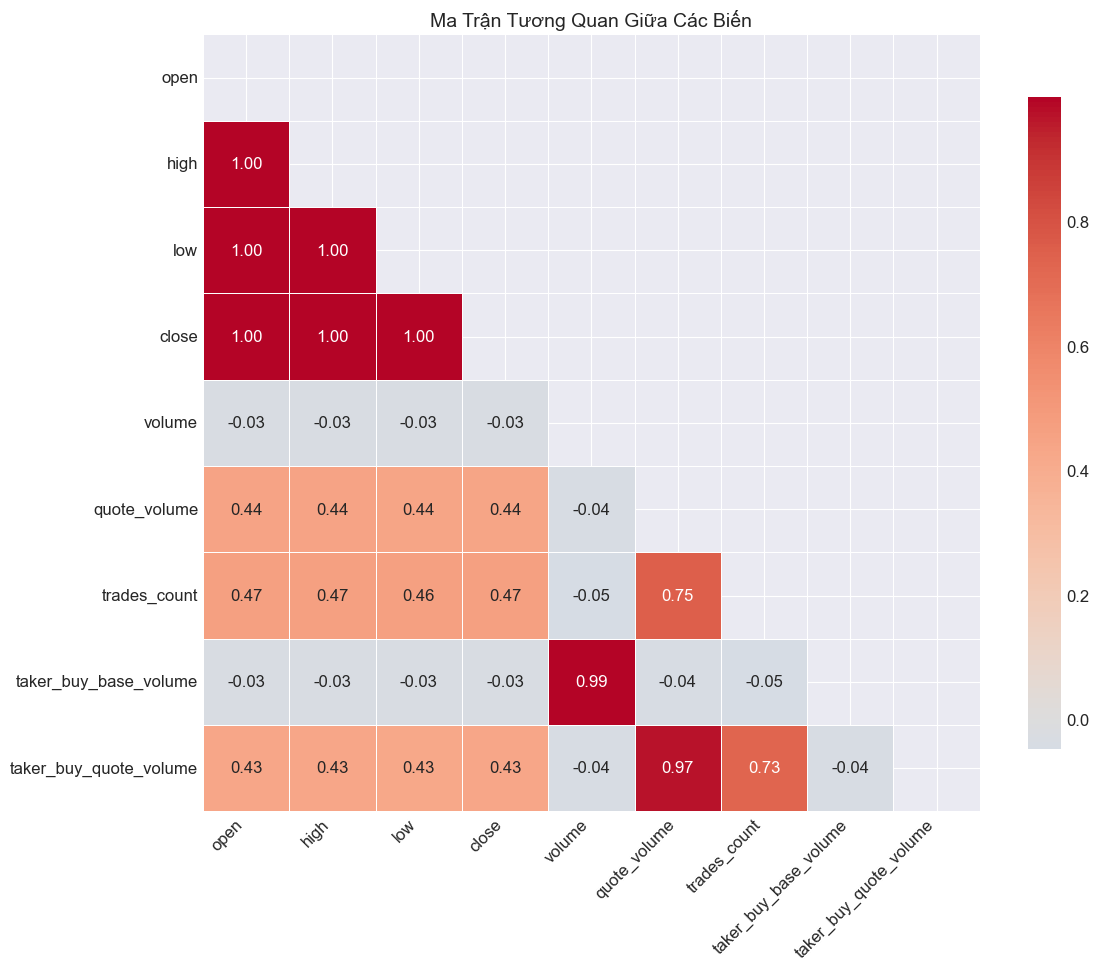


✓ Đã lưu ma trận tương quan vào 'exploration_visualizations/correlation_heatmap.png'

B. CÁC CẶP BIẾN CÓ TƯƠNG QUAN CAO:
--------------------------------------------------
      Biến 1                 Biến 2  Correlation
        open                   high     0.999994
         low                  close     0.999994
        high                  close     0.999993
        open                    low     0.999990
        high                    low     0.999989
        open                  close     0.999987
      volume  taker_buy_base_volume     0.993282
quote_volume taker_buy_quote_volume     0.974943

C. CÁC CẶP BIẾN CÓ TƯƠNG QUAN THẤP:
--------------------------------------------------
               Biến 1                 Biến 2  Correlation
         trades_count  taker_buy_base_volume    -0.047696
               volume           trades_count    -0.047605
         quote_volume  taker_buy_base_volume    -0.037245
               volume           quote_volume    -0.037165
        

In [17]:
# 7. PHÂN TÍCH TƯƠNG QUAN
# ==============================================================================
print("\n" + "="*80)
print("BƯỚC 6: PHÂN TÍCH TƯƠNG QUAN")
print("="*80)

print("\nA. MA TRẬN TƯƠNG QUAN GIỮA CÁC BIẾN SỐ:")
print("-" * 50)

# Chọn các cột số quan trọng
important_features = ['open', 'high', 'low', 'close', 'volume', 'quote_volume', 
                     'trades_count', 'taker_buy_base_volume', 'taker_buy_quote_volume']
available_features = [col for col in important_features if col in df.columns]

if len(available_features) >= 3:
    # Tính ma trận tương quan
    corr_matrix = df[available_features].corr()
    
    print("Ma trận tương quan:")
    print(corr_matrix.round(3))
    
    # Tạo heatmap
    fig, ax = plt.subplots(figsize=(12, 10))
    
    visualizer_raw.plot_correlation_heatmap(
        ax,
        df,
        'Ma Trận Tương Quan Giữa Các Biến',
        available_features
    )
    
    plt.tight_layout()
    plt.savefig('exploration_visualizations/correlation_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n✓ Đã lưu ma trận tương quan vào 'exploration_visualizations/correlation_heatmap.png'")
    
    # Phân tích các cặp tương quan cao
    print("\nB. CÁC CẶP BIẾN CÓ TƯƠNG QUAN CAO:")
    print("-" * 50)
    
    # Tìm các cặp có correlation > 0.8
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > 0.8:
                high_corr_pairs.append({
                    'Biến 1': corr_matrix.columns[i],
                    'Biến 2': corr_matrix.columns[j],
                    'Correlation': corr_matrix.iloc[i, j]
                })
    
    if high_corr_pairs:
        high_corr_df = pd.DataFrame(high_corr_pairs)
        print(high_corr_df.sort_values('Correlation', ascending=False).to_string(index=False))
    else:
        print("Không có cặp biến nào có tương quản cao (>0.8)")
        
    # Phân tích các cặp tương quan thấp
    print("\nC. CÁC CẶP BIẾN CÓ TƯƠNG QUAN THẤP:")
    print("-" * 50)
    
    low_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) < 0.1:
                low_corr_pairs.append({
                    'Biến 1': corr_matrix.columns[i],
                    'Biến 2': corr_matrix.columns[j],
                    'Correlation': corr_matrix.iloc[i, j]
                })
    
    if low_corr_pairs:
        low_corr_df = pd.DataFrame(low_corr_pairs)
        print(low_corr_df.sort_values('Correlation').to_string(index=False))
    else:
        print("Không có cặp biến nào có tương quản thấp (<0.1)")
        
else:
    print("✗ Không đủ features để tính ma trận tương quan")


BƯỚC 7: PHÂN TÍCH THEO THỜI GIAN

A. PHÂN TÍCH PHÂN BỐ THEO THỜI GIAN:
--------------------------------------------------
• Phạm vi thời gian: 2025-10-21 23:00:00 đến 2025-12-02 14:00:00
• Số năm: 1
• Số tháng: 3
• Số ngày: 31

B. SỐ LƯỢNG RECORDS THEO NĂM:
--------------------------------------------------
year
2025    29042


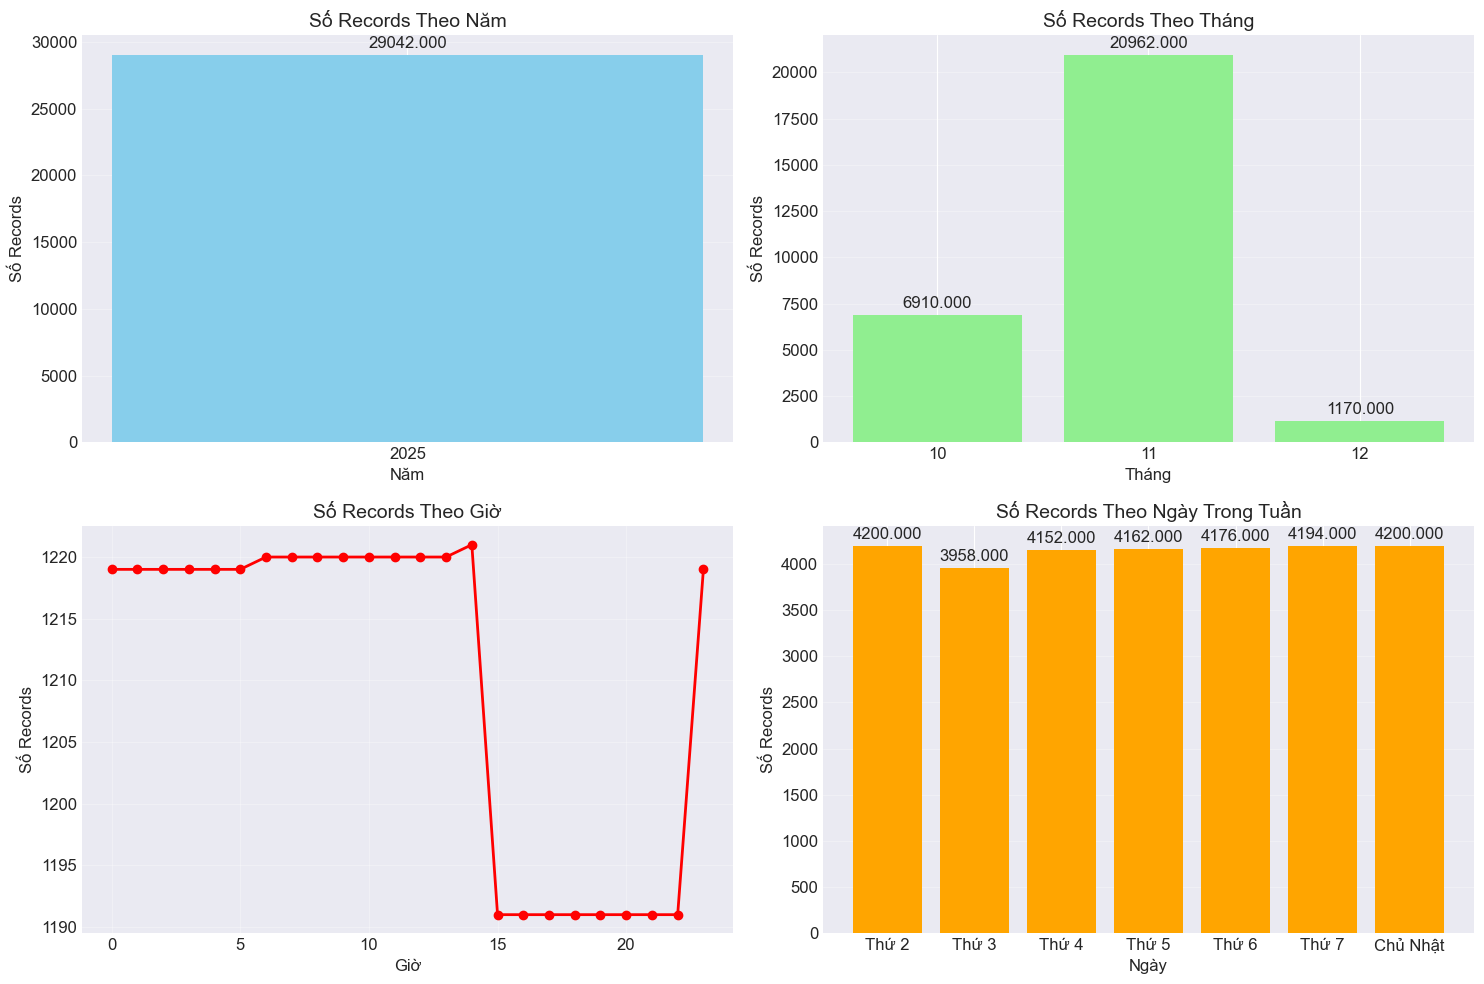


✓ Đã lưu biểu đồ phân tích thời gian vào 'exploration_visualizations/time_analysis.png'


In [18]:
# 8. PHÂN TÍCH THEO THỜI GIAN
# ==============================================================================
print("\n" + "="*80)
print("BƯỚC 7: PHÂN TÍCH THEO THỜI GIAN")
print("="*80)

# Kiểm tra cột timestamp
if 'timestamp' in df.columns:
    print("\nA. PHÂN TÍCH PHÂN BỐ THEO THỜI GIAN:")
    print("-" * 50)
    
    try:
        # Chuyển đổi timestamp thành datetime
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        
        # Trích xuất thông tin thời gian
        df['year'] = df['timestamp'].dt.year
        df['month'] = df['timestamp'].dt.month
        df['day'] = df['timestamp'].dt.day
        df['hour'] = df['timestamp'].dt.hour
        df['day_of_week'] = df['timestamp'].dt.dayofweek
        
        print(f"• Phạm vi thời gian: {df['timestamp'].min()} đến {df['timestamp'].max()}")
        print(f"• Số năm: {df['year'].nunique()}")
        print(f"• Số tháng: {df['month'].nunique()}")
        print(f"• Số ngày: {df['day'].nunique()}")
        
        # Phân tích theo năm
        print("\nB. SỐ LƯỢNG RECORDS THEO NĂM:")
        print("-" * 50)
        yearly_counts = df['year'].value_counts().sort_index()
        print(yearly_counts.to_string())
        
        # Vẽ biểu đồ
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        axes = axes.flatten()
        
        # 1. Biểu đồ theo năm
        visualizer_raw.plot_bar_chart(
            axes[0],
            yearly_counts.index.astype(str),
            yearly_counts.values,
            'Số Records Theo Năm',
            'Năm',
            'Số Records',
            colors='skyblue'
        )
        
        # 2. Biểu đồ theo tháng
        monthly_counts = df['month'].value_counts().sort_index()
        visualizer_raw.plot_bar_chart(
            axes[1],
            monthly_counts.index.astype(str),
            monthly_counts.values,
            'Số Records Theo Tháng',
            'Tháng',
            'Số Records',
            colors='lightgreen'
        )
        
        # 3. Biểu đồ theo giờ
        hourly_counts = df['hour'].value_counts().sort_index()
        visualizer_raw.plot_line_chart(
            axes[2],
            hourly_counts.index,
            hourly_counts.values,
            'Số Records Theo Giờ',
            'Giờ',
            'Số Records',
            marker='o',
            color='red'
        )
        
        # 4. Biểu đồ theo ngày trong tuần
        dow_counts = df['day_of_week'].value_counts().sort_index()
        dow_names = ['Thứ 2', 'Thứ 3', 'Thứ 4', 'Thứ 5', 'Thứ 6', 'Thứ 7', 'Chủ Nhật']
        visualizer_raw.plot_bar_chart(
            axes[3],
            dow_names,
            dow_counts.values,
            'Số Records Theo Ngày Trong Tuần',
            'Ngày',
            'Số Records',
            colors='orange'
        )
        
        plt.tight_layout()
        plt.savefig('exploration_visualizations/time_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print("\n✓ Đã lưu biểu đồ phân tích thời gian vào 'exploration_visualizations/time_analysis.png'")
        
            
    except Exception as e:
        print(f"✗ Lỗi khi phân tích thời gian: {str(e)}")
else:
    print("✗ Không có cột timestamp để phân tích thời gian")

In [19]:
# 9. TỔNG KẾT VÀ LƯU BÁO CÁO
# ==============================================================================
print("\n" + "="*80)
print("BƯỚC 8: TỔNG KẾT VÀ LƯU BÁO CÁO")
print("="*80)

# Tạo báo cáo tổng kết
summary_report = f"""
BÁO CÁO TỔNG KẾT PHÂN TÍCH DỮ LIỆU (Phần 2.2)
"{'='*80}

1. THÔNG TIN CƠ BẢN:
   • Tổng số records: {len(df):,}
   • Tổng số cột: {len(df.columns)}
   • Cột số: {len(df.select_dtypes(include=[np.number]).columns)}
   • Cột phi số: {len(df.select_dtypes(exclude=[np.number]).columns)}

2. DATA QUALITY ISSUES:
   • Missing values: {df.isnull().sum().sum():,}
   • Tỷ lệ missing: {(df.isnull().sum().sum() / (len(df) * len(df.columns)) * 100):.2f}%
   • Cột có missing: {(df.isnull().sum() > 0).sum()}

3. PHÂN TÍCH KIỂU DỮ LIỆU:
   • Object columns: {len(df.select_dtypes(include=['object']).columns)}
   • Numeric columns: {len(df.select_dtypes(include=[np.number]).columns)}
   • Datetime columns: {len(df.select_dtypes(include=['datetime']).columns)}

4. PHÂN TÍCH THỜI GIAN (nếu có timestamp):
"""

if 'timestamp' in df.columns:
    try:
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        summary_report += f"""
   • Phạm vi thời gian: {df['timestamp'].min()} đến {df['timestamp'].max()}
   • Số ngày: {df['timestamp'].dt.date.nunique():,}
   • Số giờ: {df['timestamp'].dt.hour.nunique()}
"""
    except:
        summary_report += "   • Không thể phân tích timestamp\n"

summary_report += f"""
5. CÁC BIỂU ĐỒ ĐÃ TẠO:
   • Phân phối các biến số: exploration_visualizations/numeric_distributions.png
   • Phân tích missing values: exploration_visualizations/missing_values_analysis.png
   • Phân tích outliers: exploration_visualizations/outliers_box_plots.png
   • Ma trận tương quan: exploration_visualizations/correlation_heatmap.png
   • Phân tích thời gian: exploration_visualizations/time_analysis.png

6. RECOMMENDATIONS:
   • Xử lý missing values: Sử dụng KNN imputation hoặc interpolation
   • Xử lý outliers: Capping hoặc transformation
   • Feature engineering: Tạo thêm các features thời gian và technical indicators
   • Chuẩn hóa dữ liệu: Áp dụng StandardScaler hoặc MinMaxScaler

{'='*80}
"""

# In báo cáo
print(summary_report)

# Lưu báo cáo vào file
report_file = 'exploration_visualizations/data_exploration_report.txt'
with open(report_file, 'w', encoding='utf-8') as f:
    f.write(summary_report)

print(f"\n✓ Đã lưu báo cáo vào: {report_file}")
print(f"✓ Tổng số biểu đồ đã tạo: {len([f for f in os.listdir('exploration_visualizations') if f.endswith('.png')])}")

# Hiển thị thông tin về các file đã tạo
print("\nCÁC FILE ĐÃ ĐƯỢC TẠO:")
print("-" * 50)
for file in os.listdir('exploration_visualizations'):
    if file.endswith(('.png', '.txt')):
        filepath = os.path.join('exploration_visualizations', file)
        size_kb = os.path.getsize(filepath) / 1024
        print(f"• {file} ({size_kb:.1f} KB)")

print("\n" + "="*80)
print("HOÀN THÀNH PHÂN TÍCH DỮ LIỆU (PHẦN 2.2)")
print("="*80)


BƯỚC 8: TỔNG KẾT VÀ LƯU BÁO CÁO

BÁO CÁO TỔNG KẾT PHÂN TÍCH DỮ LIỆU (Phần 2.2)
"================================================================================

1. THÔNG TIN CƠ BẢN:
   • Tổng số records: 29,042
   • Tổng số cột: 19
   • Cột số: 14
   • Cột phi số: 5

2. DATA QUALITY ISSUES:
   • Missing values: 0
   • Tỷ lệ missing: 0.00%
   • Cột có missing: 0

3. PHÂN TÍCH KIỂU DỮ LIỆU:
   • Object columns: 4
   • Numeric columns: 14
   • Datetime columns: 1

4. PHÂN TÍCH THỜI GIAN (nếu có timestamp):

   • Phạm vi thời gian: 2025-10-21 23:00:00 đến 2025-12-02 14:00:00
   • Số ngày: 43
   • Số giờ: 24

5. CÁC BIỂU ĐỒ ĐÃ TẠO:
   • Phân phối các biến số: exploration_visualizations/numeric_distributions.png
   • Phân tích missing values: exploration_visualizations/missing_values_analysis.png
   • Phân tích outliers: exploration_visualizations/outliers_box_plots.png
   • Ma trận tương quan: exploration_visualizations/correlation_heatmap.png
   • Phân tích thời gian: exploration_visuali